In [31]:
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend, THStack
import copy
import math
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()

In [32]:
def getRangeY(hist):
    global y_upper
    max_entry = hist.GetMaximum()
    if max_entry > y_upper:
        y_upper = max_entry * 1.1
def setHistOpt(hist, lcolor, lstyle):
    hist.SetLineWidth(2)
    hist.SetLineColor(lcolor)
    hist.SetLineStyle(lstyle)
def plot(h_plot, canvas, leg, xtitle, dopt, hlabel):
    global y_upper
    h_plot.Draw(dopt)
    h_plot.GetXaxis().SetTitle(xtitle)
    h_plot.GetXaxis().SetTitleOffset(1.2)
    h_plot.GetYaxis().SetTitle("Events")
    h_plot.SetMinimum(0.1)
    h_plot.SetMaximum(y_upper)
    leg.AddEntry(h_plot,hlabel)

In [33]:
variable2use = {}
variable2use["m_jj"] = {"title": "m_{jj} [GeV]", "binning": 100, "lb": 0, "hb": 8000}
# variable2use["dijet_eta"] = {"title": "#eta_{jj}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["dR_jj"] = {"title": "#Delta R_{jj}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_jj"] = {"title": "#Delta #eta_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_jj"] = {"title": "#Delta #phi_{jj}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j0j2"] = {"title": "#Delta R_{j0j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j0j2"] = {"title": "#Delta #eta_{j0j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j0j2"] = {"title": "#Delta #phi_{j0j2}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j1j2"] = {"title": "#Delta R_{j1j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j1j2"] = {"title": "#Delta #eta_{j1j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j1j2"] = {"title": "#Delta #phi_{j1j2}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["jet_eta_0"] = {"title": "#eta_{j0}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_eta_1"] = {"title": "#eta_{j1}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_eta_2"] = {"title": "#eta_{j2}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_ptoverm_0"] = {"title": "p^{j0}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverm_1"] = {"title": "p^{j1}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverm_2"] = {"title": "p^{j2}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dR_jj_j"] = {"title": "#Delta R_{jj-j}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_jj_j"] = {"title": "#Delta #eta_{jj-j}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_jj_j"] = {"title": "#Delta #phi_{jj-j}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["jet_ptoverM_0"] = {"title": "p^{j0}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverM_1"] = {"title": "p^{j1}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverM_2"] = {"title": "p^{j2}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
# variable2use["dijet_ptoverM"] = {"title": "p^{jj}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
variable2use["M_jjj"] = {"title": "M_{jjj}", "binning": 100, "lb": 0, "hb": 10000}
# variable2use["score_BDT"] = {"title": "BDT_score", "binning": 50, "lb": 0, "hb": 1}
# variable2use["isMatched"] = {"title": "Matching status", "binning": 4, "lb": 0, "hb": 4}

hist_dic = {}
sample_list = ["Res1ToRes2GluTo3Glu_M1-3000_R-0p7","Res1ToRes2GluTo3Glu_M1-5000_R-0p7","Res1ToRes2GluTo3Glu_M1-7000_R-0p7"]

file_list = []
for i, sample in enumerate(sample_list):
#     file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/ML_study_v2/training_3TeV_0p07/BDT_ranked_matching_01_23/{sample}_BDT_Ranking.root")
    file = TFile(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/outputs_3_jets/{sample}_ML_study.root","READ")
    file_list.append(file)
    tree = file.Get("Events")
    hist_dic[sample] = {}
    for var, title in variable2use.items():
        hist_dic[sample][var] = TH1F(f"{sample}_{var}", title["title"], title["binning"], title["lb"], title["hb"])
        print(f"Processing: {sample}, {var}")
        for ievt in range(tree.GetEntries()):
            tree.GetEntry(ievt)
#             if(tree.score_BDT < 0.65):
#                 continue
            hist_dic[sample][var].Fill(getattr(tree, var))
        print(hist_dic[sample][var].GetEntries(), hist_dic[sample][var].GetMean())
        setHistOpt(hist_dic[sample][var], i+1, 1)

hist_stack = {}
for var in variable2use.keys():
    hist_stack[var] = THStack(var,var)
    for sample in sample_list:
         hist_stack[var].Add(hist_dic[sample][var])

Processing: Res1ToRes2GluTo3Glu_M1-3000_R-0p7, m_jj
144192.0 1298.1337286854023
Processing: Res1ToRes2GluTo3Glu_M1-3000_R-0p7, M_jjj
144192.0 2361.720589969193
Processing: Res1ToRes2GluTo3Glu_M1-5000_R-0p7, m_jj
147834.0 2161.819718814624
Processing: Res1ToRes2GluTo3Glu_M1-5000_R-0p7, M_jjj
147834.0 3939.5404996897882
Processing: Res1ToRes2GluTo3Glu_M1-7000_R-0p7, m_jj
139713.0 3033.1082621903392
Processing: Res1ToRes2GluTo3Glu_M1-7000_R-0p7, M_jjj
139713.0 5530.00921453603


m_jj
M_jjj


Warning in <TCanvas::Constructor>: Deleting canvas with same name: m_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: M_jjj
Info in <TCanvas::Print>: png file m_jj.png has been created
Info in <TCanvas::Print>: png file M_jjj.png has been created


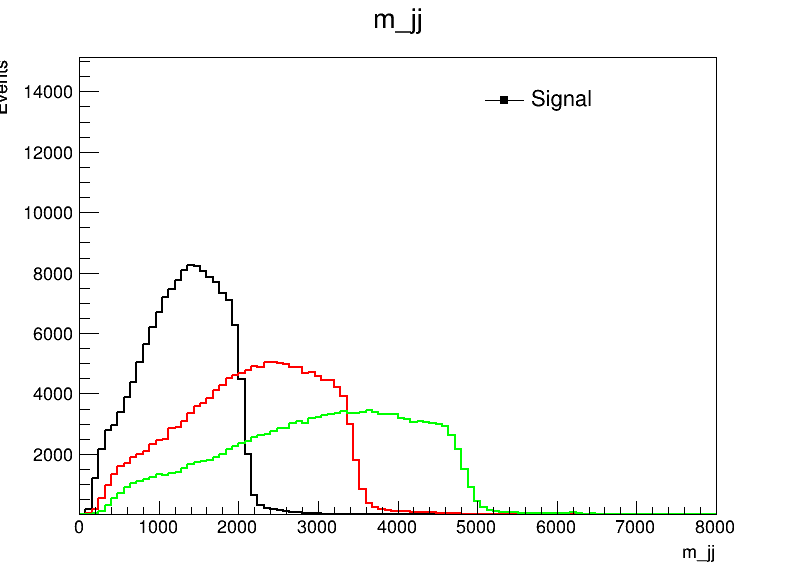

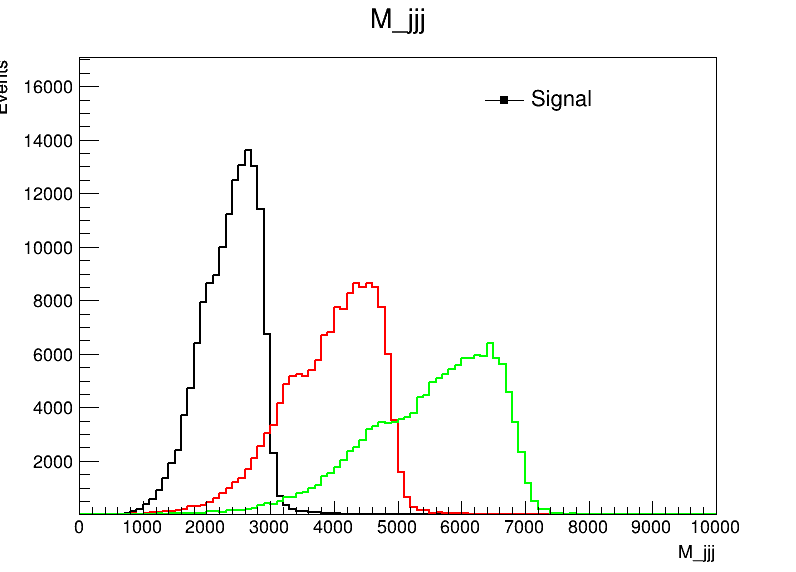

In [34]:
nvar = len(hist_dic.keys())
nrow = math.ceil(nvar/3)
plot_list = []
leg_list = []
plot_name_list = []
for variable, hist in hist_stack.items():
    y_upper = 0
    getRangeY(hist)
    c = TCanvas(variable,"",800,600)
    leg = TLegend(0.6,0.8,0.87,0.85)
    leg.SetBorderSize(0)
    title = hist.GetTitle()
    print(title)
    plot(h_plot=hist, canvas=c, leg=leg, xtitle=title, dopt="HIST nostack", hlabel="Signal")
    plot_list.append(c)
    leg_list.append(leg)
    plot_name_list.append(hist.GetName())
for i in range(0,len(plot_list)):
    plot_list[i].cd()
#     plot_list[i].SetLogy()
    leg_list[i].Draw()
    plot_list[i].Draw()
    plot_list[i].Print(f"{plot_name_list[i]}.png")